# DATA 512 Project - Part 1: Common Analysis
This part of the project answers the following research question for `Essex County, NJ`:
- How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 1, 2021?

In [251]:
import json, time, urllib.parse, csv
from datetime import datetime

## 1. Data acquisition
The following 3 datasets were downloaded to acquire the raw data for COVID-19 confirmed cases in the US for all counties:
- `confirmed_cases.csv`: https://www.kaggle.com/datasets/antgoldbloom/covid19-data-from-john-hopkins-university. This dataset has the cumulative confirmed COVID-19 cases for each US county from Feb 2020 to Oct 2021.
- `mask_mandates.csv`: https://data.cdc.gov/Policy-Surveillance/U-S-State-and-Territorial-Public-Mask-Mandates-Fro/62d6-pm5i. This dataset tells whether mask mandate was in effect for any given day for each US county from Feb 2020 to Oct 2021. There are days where this data was missing, and these were assumed to be no mask mandate in effect.
- `mask_usage.csv`: https://github.com/nytimes/covid-19-data/tree/master/mask-use. This dataset provides the percentage of the population that complied with mask mandate policies for every US county.

### 1a. Confirmed Cases
The confirmed cases dataset has one row for each US county. The columns were the dates from Feb 2020 to Oct 2021 containing the number of confirmed cases on each day. The cases for `Essex County, NJ` were read for each date and pivoted on the date columns, so that each date becomes a row along with the number of cases for that day.

The output schema of this step is:<br>
{<br>
&emsp;'date': string in YYYY-MM-DD format,<br>
&emsp;'cases': int<br>
}

In [252]:
confirmed_cases = []

should_record = 0
with open('confirmed_cases.csv', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    headings = next(reader)
    for row in reader:
        if row[0] == 'New Jersey':
            if row[1] == 'Essex':
                for i in range(len(row)):
                    if headings[i] == '2/1/20':
                        should_record = 1
                    if headings[i] == '10/1/21':
                        should_record = 0
                    if should_record == 1:
                        date = datetime.strptime(headings[i], '%m/%d/%y').date().strftime('%Y-%m-%d')
                        cases = int(row[i])
                        confirmed_cases.append([date, cases])
confirmed_cases

[['2020-02-01', 0],
 ['2020-02-02', 0],
 ['2020-02-03', 0],
 ['2020-02-04', 0],
 ['2020-02-05', 0],
 ['2020-02-06', 0],
 ['2020-02-07', 0],
 ['2020-02-08', 0],
 ['2020-02-09', 0],
 ['2020-02-10', 0],
 ['2020-02-11', 0],
 ['2020-02-12', 0],
 ['2020-02-13', 0],
 ['2020-02-14', 0],
 ['2020-02-15', 0],
 ['2020-02-16', 0],
 ['2020-02-17', 0],
 ['2020-02-18', 0],
 ['2020-02-19', 0],
 ['2020-02-20', 0],
 ['2020-02-21', 0],
 ['2020-02-22', 0],
 ['2020-02-23', 0],
 ['2020-02-24', 0],
 ['2020-02-25', 0],
 ['2020-02-26', 0],
 ['2020-02-27', 0],
 ['2020-02-28', 0],
 ['2020-02-29', 0],
 ['2020-03-01', 0],
 ['2020-03-02', 0],
 ['2020-03-03', 0],
 ['2020-03-04', 0],
 ['2020-03-05', 0],
 ['2020-03-06', 0],
 ['2020-03-07', 0],
 ['2020-03-08', 0],
 ['2020-03-09', 0],
 ['2020-03-10', 0],
 ['2020-03-11', 0],
 ['2020-03-12', 1],
 ['2020-03-13', 3],
 ['2020-03-14', 7],
 ['2020-03-15', 7],
 ['2020-03-16', 20],
 ['2020-03-17', 32],
 ['2020-03-18', 45],
 ['2020-03-19', 63],
 ['2020-03-20', 73],
 ['2020-03-21',

### 1b. Mask Mandates
The mask mandates dataset has one row by county by day as to whether there was a mask mandate in effect on that day for that county. The mask mandates for `Essex County, NJ` were read for each date and a boolean (Yes/No) was recorded for each day for this county.

The output schema of this step is:<br>
{<br>
&emsp;'date': string in YYYY-MM-DD format,<br>
&emsp;'mandate': string (Yes/No)<br>
}

In [253]:
mask_mandates = []

with open('mask_mandates.csv', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    headings = next(reader)
    for row in reader:
        if row[0] == 'NJ':
            if row[1] == 'Essex County':
                date = datetime.strptime(row[4], '%m/%d/%Y').date().strftime('%Y-%m-%d')
                mask_mandate = row[6]
                mask_mandates.append([date, mask_mandate])
mask_mandates

[['2020-04-10', 'Yes'],
 ['2020-04-11', 'Yes'],
 ['2020-04-12', 'Yes'],
 ['2020-04-13', 'Yes'],
 ['2020-04-14', 'Yes'],
 ['2020-04-15', 'Yes'],
 ['2020-04-16', 'Yes'],
 ['2020-04-17', 'Yes'],
 ['2020-04-18', 'Yes'],
 ['2020-04-19', 'Yes'],
 ['2020-04-20', 'Yes'],
 ['2020-04-21', 'Yes'],
 ['2020-04-22', 'Yes'],
 ['2020-04-23', 'Yes'],
 ['2020-04-24', 'Yes'],
 ['2020-04-25', 'Yes'],
 ['2020-04-26', 'Yes'],
 ['2020-04-27', 'Yes'],
 ['2020-04-28', 'Yes'],
 ['2020-04-29', 'Yes'],
 ['2020-04-30', 'Yes'],
 ['2020-05-01', 'Yes'],
 ['2020-05-02', 'Yes'],
 ['2020-05-03', 'Yes'],
 ['2020-05-04', 'Yes'],
 ['2020-05-05', 'Yes'],
 ['2020-05-06', 'Yes'],
 ['2020-05-07', 'Yes'],
 ['2020-05-08', 'Yes'],
 ['2020-05-09', 'Yes'],
 ['2020-05-10', 'Yes'],
 ['2020-05-11', 'Yes'],
 ['2020-05-12', 'Yes'],
 ['2020-05-13', 'Yes'],
 ['2020-05-14', 'Yes'],
 ['2020-05-15', 'Yes'],
 ['2020-05-16', 'Yes'],
 ['2020-05-17', 'Yes'],
 ['2020-05-18', 'Yes'],
 ['2020-05-19', 'Yes'],
 ['2020-05-20', 'Yes'],
 ['2020-05-21', 

### 1c. Mask Usage
The percentage of people in `Essex County, NJ` (FIPS code 34013) was recorded to see the mask usage in that county. About 70% were always complying with the mask mandates in effect.

In [254]:
mask_usage = 0

with open('mask_usage.csv', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    headings = next(reader)
    for row in reader:
        if row[0] == '34013':  # FIPS code '34013' == Essex County, NJ
            mask_usage = float(row[5])
mask_usage

0.682

## 2. Data cleaning
From the above 3 datasets, we obtain a combined `infection_rates` dataset that has the following schema:
- `date`: The date from Feb 2020 to Oct 2021.
- `infected`: This is the effective infected population on any given date. The raw dataset has cumulative confirmed cases, but the model assumes a 14 day recovery window and computes effective infected population taking into account the recoveries.
- `rate`: This is the infection rate, which is computed as (today's infected population / yesterday's infected population).
- `mandate`: 1 if there was a mask mandate in effect; 0 otherwise.
- `usage`: The mask usage percentage, which is 68.2% for Essex County, NJ.

In [255]:
infection_rates = []

recovery_window = 14
cases_in_recovery_window = []
prev_infected = 0

for case in confirmed_cases:
    # compute effective infected population count at a given date
    # Assume a 14-day recovery window for previously infected population
    date = case[0]
    curr_infected = case[1]
    cases_in_recovery_window.append(curr_infected)
    if len(cases_in_recovery_window) > recovery_window:
        curr_infected = max(0, curr_infected - cases_in_recovery_window[0])
        cases_in_recovery_window.pop(0)
    
    # compute infection_rate: infected population today / infected population yesterday
    # infection_rate > 1 => infection is going up
    # infection_rate < 1 => infection is going down
    if prev_infected == 0:
        if curr_infected == 0:
            infection_rate = 0
        else:
            infection_rate = 1
    else:
        infection_rate = curr_infected/prev_infected
    
    # add metadata for whether mask mandate was in effect for a given date
    mask_mandate = 0
    for mandate in mask_mandates:
        if mandate[0] == date:
            if mandate[1] == 'Yes':
                mask_mandate = 1
    
    # cosolidated dataset for infection rates along with mask mandate information
    infection_rates.append([date, curr_infected, infection_rate, mask_mandate, mask_usage])

    prev_infected = curr_infected

infection_rates

[['2020-02-01', 0, 0, 0, 0.682],
 ['2020-02-02', 0, 0, 0, 0.682],
 ['2020-02-03', 0, 0, 0, 0.682],
 ['2020-02-04', 0, 0, 0, 0.682],
 ['2020-02-05', 0, 0, 0, 0.682],
 ['2020-02-06', 0, 0, 0, 0.682],
 ['2020-02-07', 0, 0, 0, 0.682],
 ['2020-02-08', 0, 0, 0, 0.682],
 ['2020-02-09', 0, 0, 0, 0.682],
 ['2020-02-10', 0, 0, 0, 0.682],
 ['2020-02-11', 0, 0, 0, 0.682],
 ['2020-02-12', 0, 0, 0, 0.682],
 ['2020-02-13', 0, 0, 0, 0.682],
 ['2020-02-14', 0, 0, 0, 0.682],
 ['2020-02-15', 0, 0, 0, 0.682],
 ['2020-02-16', 0, 0, 0, 0.682],
 ['2020-02-17', 0, 0, 0, 0.682],
 ['2020-02-18', 0, 0, 0, 0.682],
 ['2020-02-19', 0, 0, 0, 0.682],
 ['2020-02-20', 0, 0, 0, 0.682],
 ['2020-02-21', 0, 0, 0, 0.682],
 ['2020-02-22', 0, 0, 0, 0.682],
 ['2020-02-23', 0, 0, 0, 0.682],
 ['2020-02-24', 0, 0, 0, 0.682],
 ['2020-02-25', 0, 0, 0, 0.682],
 ['2020-02-26', 0, 0, 0, 0.682],
 ['2020-02-27', 0, 0, 0, 0.682],
 ['2020-02-28', 0, 0, 0, 0.682],
 ['2020-02-29', 0, 0, 0, 0.682],
 ['2020-03-01', 0, 0, 0, 0.682],
 ['2020-03

## 3. Visualization

In [256]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import pandas as pd

data = pd.DataFrame(infection_rates).rename(
    columns={0:'date', 1:'infected', 2:'rate', 3:'mandate', 4:'usage'}
)

data["date"] = pd.to_datetime(data["date"])
data

,date,infected,rate,mandate,usage
0,2020-02-01,0,0.000000,0,0.682
1,2020-02-02,0,0.000000,0,0.682
2,2020-02-03,0,0.000000,0,0.682
3,2020-02-04,0,0.000000,0,0.682
4,2020-02-05,0,0.000000,0,0.682
...,...,...,...,...,...
603,2021-09-26,2052,0.990826,0,0.682
604,2021-09-27,2017,0.982943,0,0.682
605,2021-09-28,1922,0.952900,0,0.682
606,2021-09-29,1917,0.997399,0,0.682


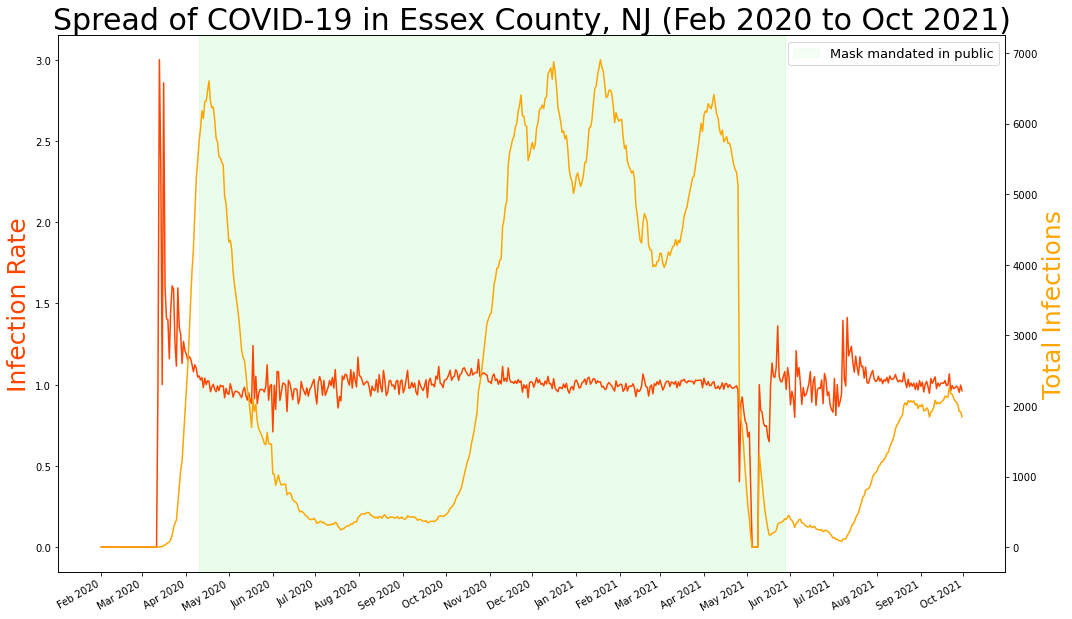

In [257]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()

ax.set_title('Spread of COVID-19 in Essex County, NJ (Feb 2020 to Oct 2021)', size=30)

# plot infection rate
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_ylabel('Infection Rate', fontsize=25, color='orangered')
ax.plot(data["date"], data["rate"], color='orangered');

# plot total infected population
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax2.set_ylabel('Total Infections', fontsize=25, color='orange')
ax2.plot(data["date"], data['infected'], color='orange')

# highlight time periods with mask mandate in effect
prev_mandate = 0
for index, row in data.iterrows():
    curr_mandate = row['mandate']
    if curr_mandate == 1:
        if prev_mandate == 0:
            start = row['date']
    if curr_mandate == 0:
        if prev_mandate == 1:
            end = row['date']
            ax.axvspan(date2num(start), date2num(end), color="palegreen", alpha=0.1)
    prev_mandate = curr_mandate
ax.axvspan(date2num(start), date2num(end), label="Mask mandated in public",color="palegreen", alpha=0.1)
ax.legend(loc=1, prop={'size': 13})

fig.tight_layout()
fig.autofmt_xdate()

## 4. Conclusion
The plot traces both infection rates, as well as, total infected population count for the time period between Feb 2020 and Oct 2021. Further, the time period where there was a mask mandate in effect was highlighted on the plot.

From the visualization, the infection rate was spiky outside of mask mandate period. Whereas, the infection rate stayed flat at 1 during the mask mandate period. Although we do see a spike in total infected population count during the mask mandate period, the infection rate itself stayed constant at about 1.0. This means that the mask mandates were effective in containing the intraday infection spread. The spike in total infections was more gradual over many days rather than a sudden spike in one day.

This shows that the mask mandates were indeed effective in keeping the rate of infections at check, which in turn, would have made it easier on the county officials and the hospitals in handling the new cases coming in each day.